# YOLOv3

In [1]:
import os.path

import cv2
import numpy as np
import requests

In [2]:
# Download YOLO net config file

yolo_config = 'yolov3.cfg'
if not os.path.isfile(yolo_config):
    url = 'https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg'
    r = requests.get(url)
    with open(yolo_config, 'wb') as f:
        f.write(r.content)
        
# download yolo net weights

yolo_weights = 'yolov3.weights'
if not os.path.isfile(yolo_weights):
    url = 'https://pjreddie.com/media/files/yolov3.weights'
    r = requests.get(url)
    with open(yolo_weights, 'wb') as f:
        f.write(r.content)
        
# load the network

net = cv2.dnn.readNet(yolo_weights, yolo_config)

'yolov3.weights'

In [3]:
# need to download the names of the coco dataset classes

classes_file = 'coco.names'
if not os.path.isfile(classes_file):
    url = 'https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names'
    r = requests.get(url)
    with open(classes_file, 'wb') as f:
        f.write(r.content)
        
# load the class names
with open(classes_file, 'r') as f:
    classes = [line.strip() for line in f.readlines()]

In [35]:
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [12]:
image_file = "C:/Users/Billi/repos/Computer_Vision/OpenCV/bdd100k/seg/images/train/00a9cd6b-b39be004.jpg"

In [1]:
image_file = 'C:/Users/Billi/repos/Computer_Vision/OpenCV/bdd100k/seg/images/train/00e9be89-00001315.jpg'

In [156]:
image = cv2.imread(image_file)

In [157]:
blob = cv2.dnn.blobFromImage(image, 1 / 255, (416, 416), (0,0,0), True, crop=False)

In [160]:
cv2.imshow('image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [161]:
# set as input to the net
net.setInput(blob)

# get network output layers
layer_names = net.getLayerNames()
print(len(layer_names))

254


In [162]:
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [163]:
# inference 
# the network outputs multiple lists of anchor boxes,
# one for each detected class
outs = net.forward(output_layers)

In [164]:
# extract bounding boxes

class_ids = list()
confidences = list()
boxes = list()

# iterate over all classes
for out in outs:
    # iterate over the anchor boxes for each class
    for detection in out:
        # bounding box
        center_x = int(detection[0] * image.shape[1])
        center_y = int(detection[1] * image.shape[0])
        w, h = int(detection[2] * image.shape[1]), int(detection[3] * image.shape[0])
        x, y = center_x - w // 2, center_y - h // 2
        boxes.append([x, y, w, h])
        
        # confidence
        confidences.append(float(detection[4]))
        
        # class
        
        class_ids.append(np.argmax(detection[5:]))

In [165]:
# removing the noise with non-max suppression:

ids = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=0.75, nms_threshold=0.5)

In [166]:
# drawing the bounding boxes and their captions on the image:
colors = np.random.uniform(0, 255, size=(len(classes), 3))

for i in ids:
    i = i[0]
    x, y, w, h = boxes[i]
    class_id = class_ids[i]
    
    color = colors[class_id]
    
    cv2.rectangle(img=image,
                 pt1=(round(x), round(y)),
                 pt2=(round(x + w), round(y + h)),
                 color = color,
                 thickness=3)
    
    cv2.putText(img=image,
               text=f"{classes[class_id]}: {confidences[i]:.2f}",
               org=(x - 10, y - 10),
                fontFace = cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=color,
                thickness=2
               )

In [168]:
cv2.imshow("object detection", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [45]:
img = images[0]

In [71]:
blobs = []
for i in range(len(images)):
    imgs = cv2.imread(images[i])
    blob = cv2.dnn.blobFromImage(image, 1 / 255, (416, 416), (0, 0, 0), True, crop=False)
    blobs.append(blob)

In [83]:
def get_prediction(blob):
    net.setInput(blob)
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    outs = net.forward(output_layers)
    return outs

In [118]:


# extract bounding boxes
def get_boxes(outs):
 
    
    class_ids = []
    confidences = []
    boxes = []
    # iterate over all classes
    for out in outs:
        # iterate over the anchor boxes for each class
        for detection in out:
            # bounding box
            center_x = int(detection[0] * image.shape[1])
            center_y = int(detection[1] * image.shape[0])
            w, h = int(detection[2] * image.shape[1]), int(detection[3] * image.shape[0])
            x, y = center_x - w // 2, center_y - h // 2
            boxes.append([x, y, w, h])

            # confidence
            confidences.append(float(detection[4]))

            # class
            class_ids.append(np.argmax(detection[5:]))
            
        return boxes, confidences, class_ids
        

In [119]:
def get_ids(boxes, confidences):
    ids = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=0.75, nms_threshold=0.5)
    return ids

In [169]:
# drawing the bounding boxes and their captions on the image:
def colors(image):
    colors = np.random.uniform(0, 255, size=(len(classes), 3))

    for i in ids:
        i = i[0]
        x, y, w, h = boxes[i]
        class_id = class_ids[i]

        color = colors[class_id]

        cv2.rectangle(img=image,
                      pt1=(round(x), round(y)),
                      pt2=(round(x + w), round(y + h)),
                      color = color,
                      thickness=3)

        cv2.putText(img=image,
                    text=f"{classes[class_id]}: {confidences[i]:.2f}",
                    org=(x - 10, y - 10),
                    fontFace = cv2.FONT_HERSHEY_SIMPLEX,
                    fontScale=0.8,
                    color=color,
                    thickness=2)
        
        return image
        

In [132]:
image_file = "C:/Users/Billi/repos/Computer_Vision/OpenCV/bdd100k/seg/images/train/00a9cd6b-b39be004.jpg"

In [133]:
def read_img(image):
    blob = cv2.dnn.blobFromImage(image, 1 / 255, (416, 416), (0, 0, 0), True, crop=False)
    return blob

In [142]:
image = cv2.imread(image_file)

In [143]:
blob = read_img(image)

In [144]:
outs = get_prediction(blob)


In [145]:
outs

[array([[0.04523977, 0.05428165, 0.6042785 , ..., 0.        , 0.        ,
         0.        ],
        [0.05094838, 0.03162613, 0.39005852, ..., 0.        , 0.        ,
         0.        ],
        [0.04900686, 0.0406242 , 0.844052  , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9616695 , 0.9512387 , 0.47880077, ..., 0.        , 0.        ,
         0.        ],
        [0.96290874, 0.96514183, 0.30395266, ..., 0.        , 0.        ,
         0.        ],
        [0.96619505, 0.96609867, 0.83741003, ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.02319534, 0.02276872, 0.05552352, ..., 0.        , 0.        ,
         0.        ],
        [0.01660879, 0.01813268, 0.33165148, ..., 0.        , 0.        ,
         0.        ],
        [0.0220722 , 0.0172871 , 0.07176784, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.97489715, 0.97702056, 0.04478328, ..., 0.        , 0.        ,
         0.        

In [146]:
boxes, confidences, class_ids = get_boxes(outs)

In [149]:
ids = get_ids(boxes, confidences)

In [170]:
final = colors(image)

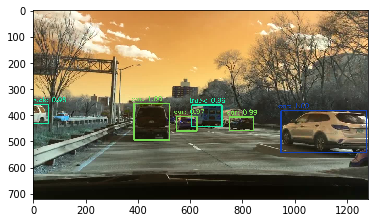

In [171]:
plt.imshow(final)

In [172]:
cv2.imshow("final", final)
cv2.waitKey(0)

13

In [181]:
import random, os
images = []
for number in range(10):
    path = r"C:/Users/Billi/repos/Computer_Vision/OpenCV/bdd100k/seg/images/train"
    random_filename = random.choice([
        x for x in os.listdir(path)
        if os.path.isfile(os.path.join(path, x))
    ])
    print(random_filename)
    images.append(random_filename)

3c605e1e-65dcc698.jpg
1cc77c32-f18a685c.jpg
6268fd0c-4c007855.jpg
631973a4-ed1655d9.jpg
0879ba7f-550d2c41.jpg
5b3af830-bcdc5f4d.jpg
9c2ebc8a-fffbeb14.jpg
5804addd-c37259da.jpg
30293d7d-00000000.jpg
17c135e3-00000000.jpg


In [184]:
images[0]

'3c605e1e-65dcc698.jpg'

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(outs[i], cv2.COLOR_BGR2RGB))

IndexError: list index out of range

<Figure size 1440x1440 with 0 Axes>

In [50]:
cv2.imshow("out1", outs)
cv2.waitKey(0)

TypeError: Expected Ptr<cv::UMat> for argument '%s'